In [6]:
names = open('names.txt', 'r').read().splitlines()

In [7]:
# Implementing a bigram (2-gram) model: only one character predicts the next
import torch

N = torch.zeros((27, 27), dtype=torch.int32) # 26 letters + start and end token

# Make a mapping from characters to indices
chars = sorted(list(set(''.join(names)))) # concatenate all names, find unique characters, then sort alphabetically
stoi = {s:i+1 for i, s in enumerate(chars)} # map each character to an index, letting 0 be for start and end tokens
# explicitly add start and end token
stoi['.'] = 0

In [27]:
# Count the number of times each character appears in a 2D array
for name in names: # iterate over each name
    chs = ['.'] + list(name) + ['.'] # add start and end tokens
    
    # iterate over each pair of characters
    for ch1, ch2 in zip(chs, chs[1:]): # ex. <S>emma<E> -> (<S>, e), (e, m), (m, m), (m, a), (a, <E>)
        N[stoi[ch1], stoi[ch2]] += 1 # add bigram to the count

# Note that N[i, j] is the number of times "ij" happens
# Make an index to s mapping
itos = {i:s for s, i in stoi.items()}



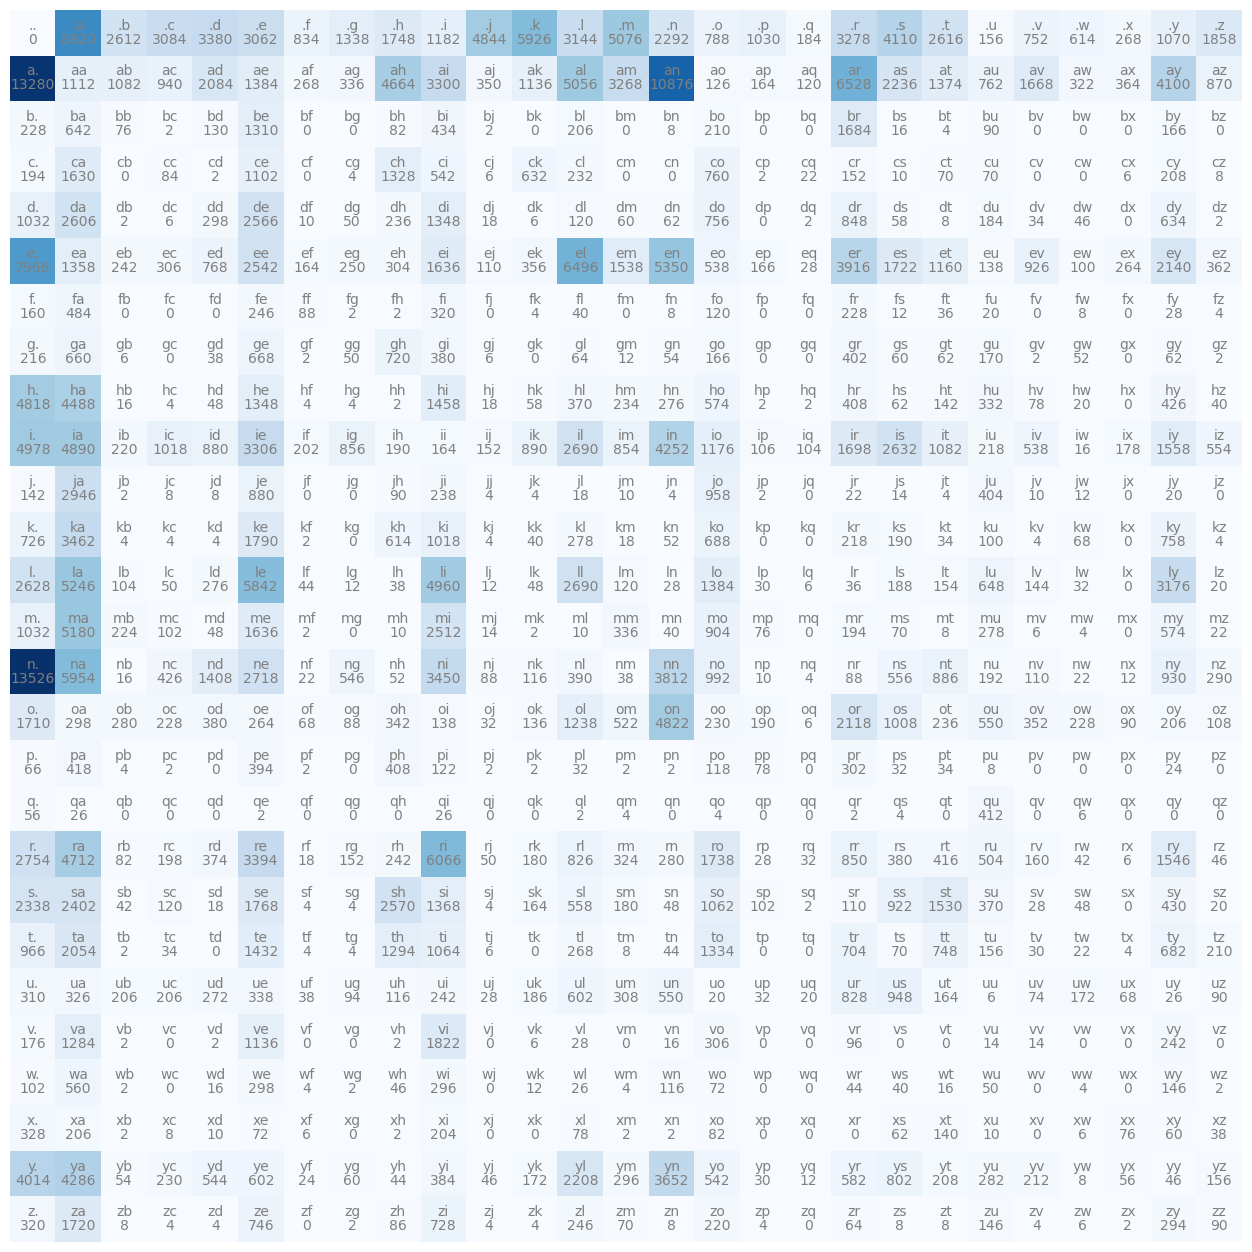

In [28]:
# Visualization

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [24]:
# Getting the shapes right
N.shape

torch.Size([27, 27])

In [25]:
N.sum(1, keepdim=True).shape
# N.sum(1, keepdim=True) is a column vector of the number of times each character appears
# 1 means we sum the 1st dimension ie the rows; 0th dimension is the columns ie 27x27 is columnxrow

torch.Size([27, 1])

In [32]:
# Normalize the counts to get probabilities, use tensor operations for cleaner code
N = N.float()
N = N / N.sum(dim=1, keepdim=True) # divide each row by the sum of the row
# keepdim=True keeps the dimension of the sum, so that the division can be broadcasted
# broadcasting rules (operations on tensors) requires:
#   Each tensor has at least one dimension.
#   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

# If we don't keep the dimension, N.sum(1) will be a 27-vector as opposed to the desired 27x1 matrix, where each entry is its own array
# Then doing N / N.sum(1) will be 27x27 / 0x27, so broadcasting rules will go
# 27x27 -> 1x27 (row vector with each original row's sum) -> 27x27 (each row is divided by the row vector instead of the row sum)


In [34]:
# Make our bigram name language model

# Make our random seed generator
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    # Generate a name
    name = [] # keep track of the name we're generating
    index = 0 # start with start token, ie index token 0
    while True:
        # Normalize the current column (ie the probabilities of the next character)
        p = N[index]
        # p = N[index].float()
        # p /= p.sum()

        # sample from the multinomial distribution once, and grab the number (this is our next index character)
        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() 

        # If token is end token, break
        if index == 0:
            break

        # Else, add the character to the name and update the index
        else:
            name.append(itos[index])

    print(''.join(name)) # print the generated name

cexze
momasurailezitynn
konimittain
llayn
ka
